# Supervised Learning Project: <br /> Personal Loan Campaign Modelling
### Thomas Webb <br /> October 8th, 2020


# Import libraries and read .csv files

In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8.5)})

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression

In [479]:
bank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

##### Evaluate Data (Data Types, Missing Values, Statistical Summary)

In [480]:
bank.shape

(5000, 14)

In [481]:
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [482]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [483]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [484]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1




# Exploratory Data Analysis

##### What are the number of unique values in each column?

In [485]:
for i in bank.columns[:]:    # Number of unique values in each column
    bank_i = bank[i].nunique()
    print(i,bank_i) 

ID 5000
Age 45
Experience 47
Income 162
ZIP Code 467
Family 4
CCAvg 108
Education 3
Mortgage 347
Personal Loan 2
Securities Account 2
CD Account 2
Online 2
CreditCard 2


##### How many people have a mortgage payment of 0?

In [486]:
bank['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

##### `Insights:`

There are **3462** people with a house mortgage payment value of **$000**. <br />
This is roughly **69.2%** of the sample.

##### How many people have credit card spending of 0?

In [487]:
with_credit = bank[bank['CreditCard'] == 1]

In [488]:
with_credit.shape

(1470, 14)

In [489]:
zero_credit = with_credit[with_credit['CCAvg'] == 0]

In [490]:
zero_credit.shape

(28, 14)

##### `Insights:`

There are **1470** people with bank issued credit cards. <br />
Out of those people, only **28** people have average credit card spending of **$0.00**. <br />
This accounts for roughly **1.9%** of credit card users and **0.5%** of the sample.

##### Univariate plots of variables

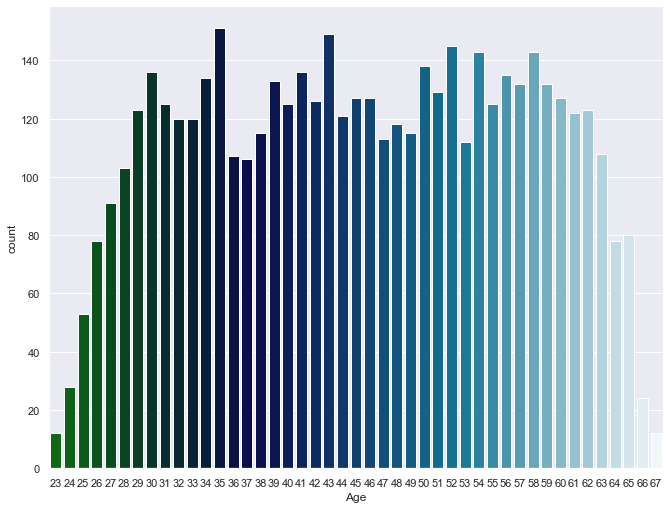

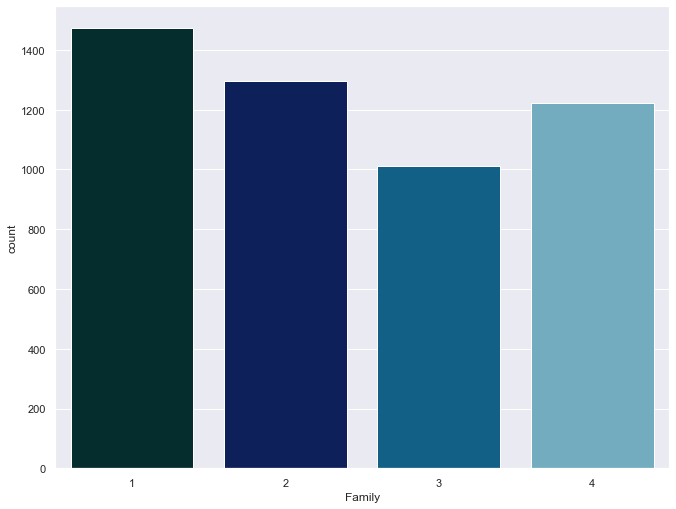

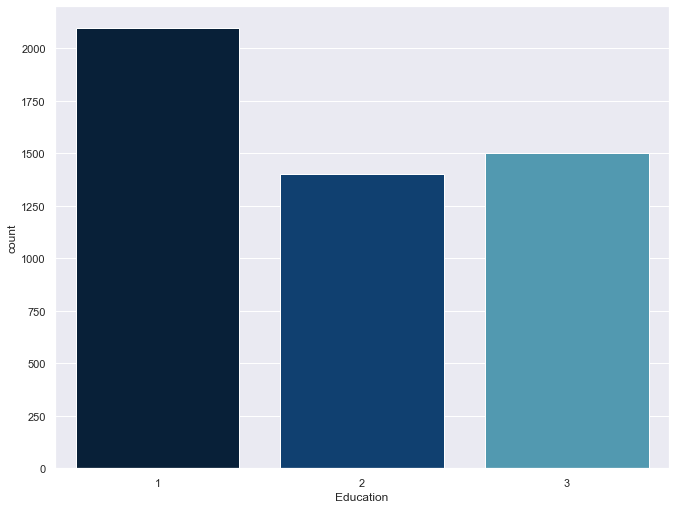

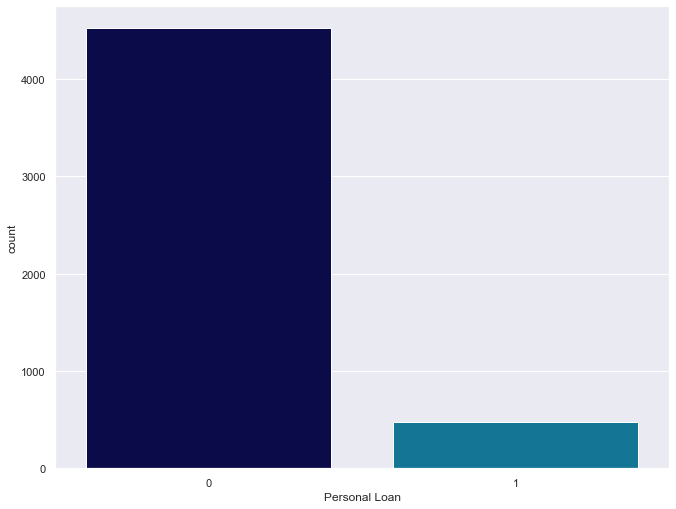

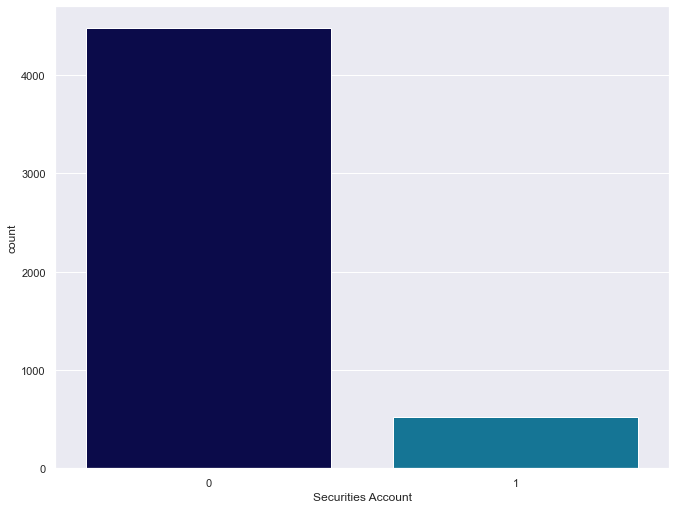

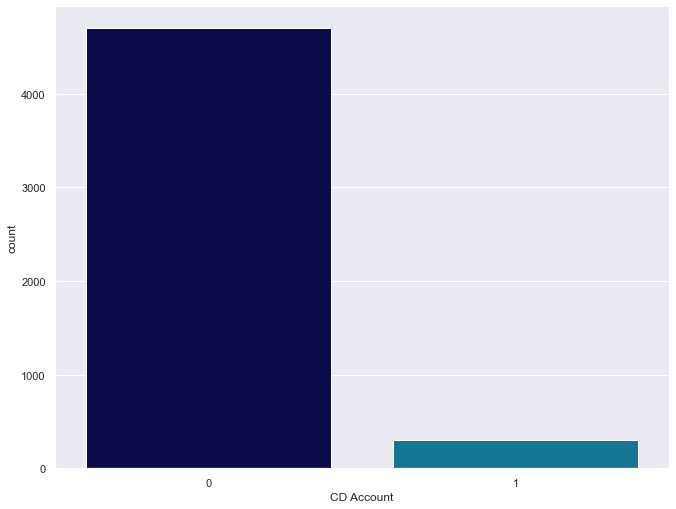

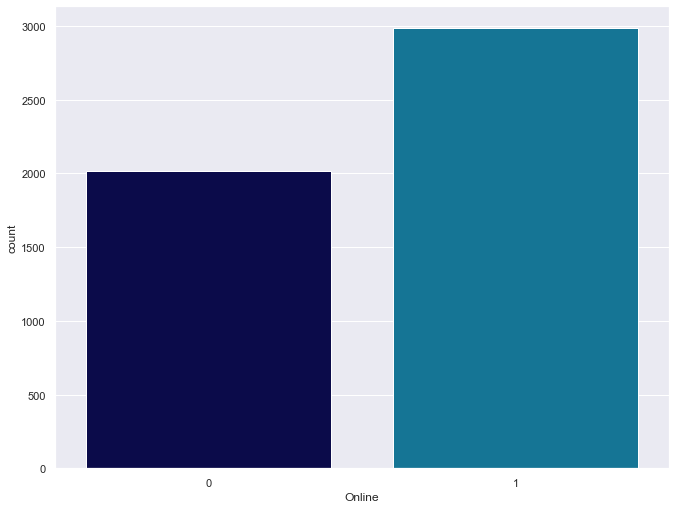

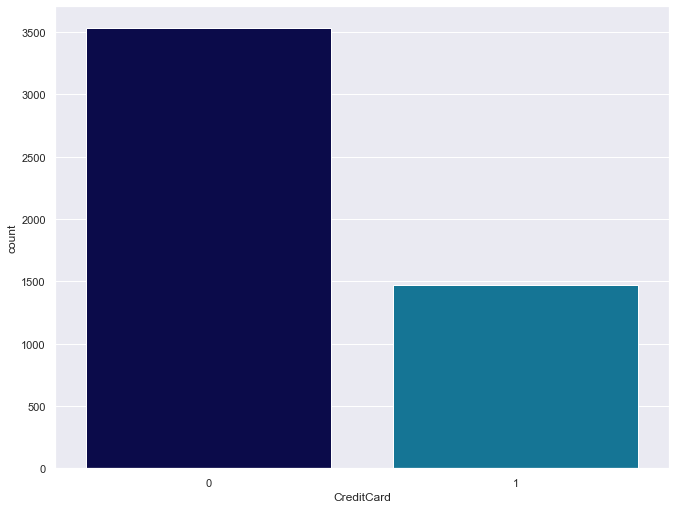

In [491]:
for i in ['Age','Family', 'Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    sns.countplot(bank[i], palette='ocean')
    plt.show()

##### Value counts represented as percentages

In [492]:
for i in list(bank.columns[9:14]):
    print(i)
    print((bank[i].value_counts(normalize=True))*100)
    print()

Personal Loan
0    90.4
1     9.6
Name: Personal Loan, dtype: float64

Securities Account
0    89.56
1    10.44
Name: Securities Account, dtype: float64

CD Account
0    93.96
1     6.04
Name: CD Account, dtype: float64

Online
1    59.68
0    40.32
Name: Online, dtype: float64

CreditCard
0    70.6
1    29.4
Name: CreditCard, dtype: float64



##### `Insights:`

- About 1 in 10 people or less have a CD Account, Personal Loan, or Securities Account.
- Over half over the customers use online banking.

# Bivariate Analysis

In [493]:
bank.groupby(['Personal Loan']).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [494]:
bank.groupby(['Personal Loan']).median()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2518.5,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,2342.0,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


In [495]:
pd.crosstab(bank['Family'],bank['Personal Loan'],normalize ='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


In [496]:
pd.crosstab(bank['Education'],bank['Personal Loan'],normalize ='index')

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


In [497]:
pd.crosstab(bank['Securities Account'],bank['Personal Loan'],normalize ='index')

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


In [498]:
pd.crosstab(bank['CD Account'],bank['Personal Loan'],normalize ='index')

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


In [499]:
pd.crosstab(bank['Online'],bank['Personal Loan'],normalize ='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


In [500]:
pd.crosstab(bank['CreditCard'],bank['Personal Loan'],normalize ='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


##### `Insights:` <br>

- Ownership of a CD account is the most highly correlated variable with acceptance of personal loans, as 46.3 percent of people with a CD account also accept a Person Loan (compared to only 7% without a CD account)

- People who who accept Personal Loans on average have significantly higher Mortgage, Income, Education, and Credit Card Spending

# Get data model ready

- Because there are some negative values in the Experience column, those will be replaced with zeros.
- We will drop the ID and ZIP Code columns as the data has no correlation to the personal loan status.


In [501]:
bank[bank['Experience'] < 0] = 0

In [502]:
bank.drop(['ID'], axis=1, inplace=True)
bank.drop(['ZIP Code'], axis=1, inplace=True)

# Split the data into training and testing sets in the ratio of 70:30

In [503]:
X = bank.drop('Personal Loan',axis=1) 
Y = bank['Personal Loan']   

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


In [504]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bank.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [505]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Personal Loan'] == 1]), (len(bank.loc[bank['Personal Loan'] == 1])/len(bank.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Personal Loan'] == 0]), (len(bank.loc[bank['Personal Loan'] == 0])/len(bank.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



# Use Logistic Regression model to predict whether the customer will accept a personal loan or not

In [506]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
coef_df

,0,1,2,3,4,5,6,7,8,9,10,intercept
0,-0.365213,0.36113,0.049493,0.671361,0.159095,1.669815,0.000821,-0.899378,3.227171,-0.567984,-0.971603,-3.457219


In [507]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9466666666666667


##### Confusion Matrix

In [508]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = [0,1], yticklabels = [0,1])
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.show()

Training Accuracy: 0.9522857142857143
Testing Accuracy: 0.9466666666666667 

Confusion Matrix


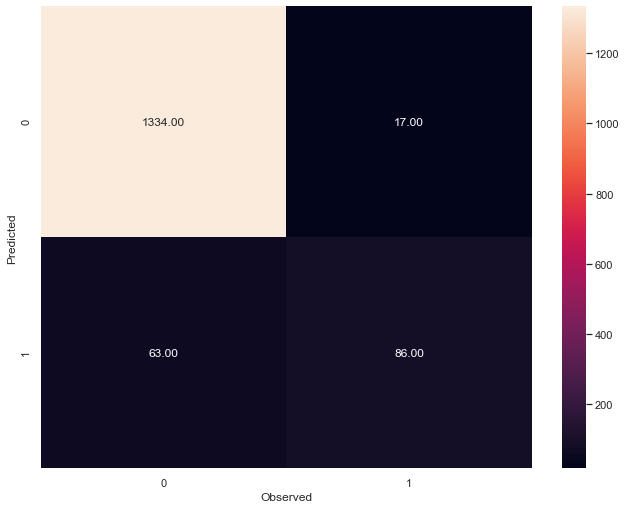

None
Recall: 0.5771812080536913
Precision: 0.8349514563106796
F1 Score: 0.6825396825396827
Roc Auc Score: 0.7822989682015311


In [509]:
print("Training Accuracy:", model.score(x_train,y_train))
print("Testing Accuracy:", model.score(x_test,y_test),'\n')
print("Confusion Matrix")
print(draw_cm(y_test,y_predict))
print("Recall:", recall_score(y_test,y_predict))
print("Precision:", precision_score(y_test,y_predict))
print("F1 Score:", f1_score(y_test,y_predict))
print("Roc Auc Score:", roc_auc_score(y_test,y_predict))

##### `Interpretting the confusion matrix`

**True Positives (TP)**: we correctly predicted that **86** people accept Personal Loans

**True Negatives (TN)**: we correctly predicted that **1334** people do not accept Personal Loans

**False Positives (FP)**: we incorrectly predicted that **63** people would accept Personal Loans, when in reality, they actually will not accept. (Type I error)

**False Negatives (FN)**: we incorrectly predicted that **17** people would not accept Personal Loans, when in reality, they actually will accept. (Type II error)

# Evaluate performance of Logistic Regression and its parameters

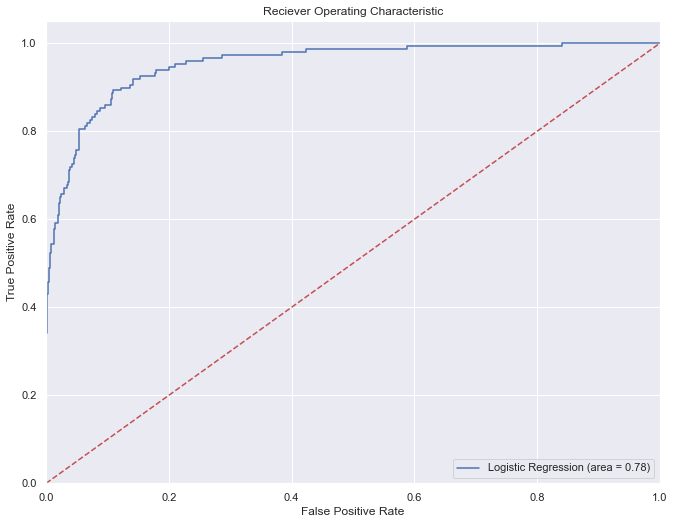

In [510]:
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()

##### Feature Importance for coefficients

In [511]:
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff', ascending = False)

,Col,Coeff
8,CD Account,3.23
5,Education,1.67
10,CreditCard,0.97
7,Securities Account,0.90
3,Family,0.67
9,Online,0.57
0,Age,0.37
1,Experience,0.36
4,CCAvg,0.16
2,Income,0.05


##### `Insights:`
Higher coefficients are indicative of a greater affect on our model. Because of this, we can tell that CD Accounts are the factor that most greatly influences our models predictions, as predicted in our EDA.

##### Dataframe containing incorrectly predicted outcomes

In [512]:
bank_falses= x_test.copy()
bank_falses['Observed Personal Loan'] = y_test
bank_falses['Predicted Personal Loan'] = y_predict
bank_falses.loc[bank_falses['Observed Personal Loan'] != bank_falses['Predicted Personal Loan']]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
1513,45,21,183,2,1.4,1,354,0,0,0,0,0,1
3347,65,41,78,3,2.0,3,0,0,1,1,1,0,1
3271,52,27,93,4,4.1,2,0,0,0,0,1,1,0
349,26,2,60,2,3.0,1,132,0,0,0,0,1,0
927,65,40,95,3,3.7,2,138,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,35,9,113,3,0.8,3,0,0,0,1,0,1,0
813,50,25,130,1,1.1,2,0,0,0,1,0,1,0
3766,59,35,108,4,3.8,2,304,0,0,1,0,1,0
421,28,3,115,4,3.1,2,0,0,0,0,0,1,0


# Business Insights

- Our model was able to correclty predict the outcome of a customer's decision to take a personal loan **94.6%** of the time. This prediction accuracy was consistent accross the training and testing sets.

- **CD Accounts**, **Education**, **Credit Cards**, and **Securities Accounts** seem to be the features of the model that most greatly influence the model's output. This is reflected by their coefficients.

##### `Review of the metrics surrounding this model`

    Training Accuracy: 0.9522857142857143
    Testing Accuracy: 0.9466666666666667
    Recall: 0.5771812080536913
    Precision: 0.8349514563106796
    F1 Score: 0.6825396825396827
    Roc Auc Score: 0.7822989682015311

When looking at the confusion matrix for this model, it is important to understand that **True Positive (TP)** results are the results that end up making the bank money. **False Positive (FP)** results are the type of errors that will end up costing the bank the most money. The outcome of the model developed above is made up of more **True Postive** results than **False Positive** results, meaning the bank will most likely be able to make more money.